# **ChatBot Dictator**

# **Microsoft/DialoGPT-large model**
## **Microsoft DialoGPT is a large-scale pretrained dialogue answer generating model for multiturn talks. Hundreds of Gigabytes of vernacular data are used to tailor pretraining techniques to response generation. DialoGPT is written in the form of an autoregressive (AR) language model and has a multi-layer transformer as its model architecture. This model's responses are comparable to human response quality in a single-turn conversation Turing test.**

## **Microsoft/DialoGPT Architecture**
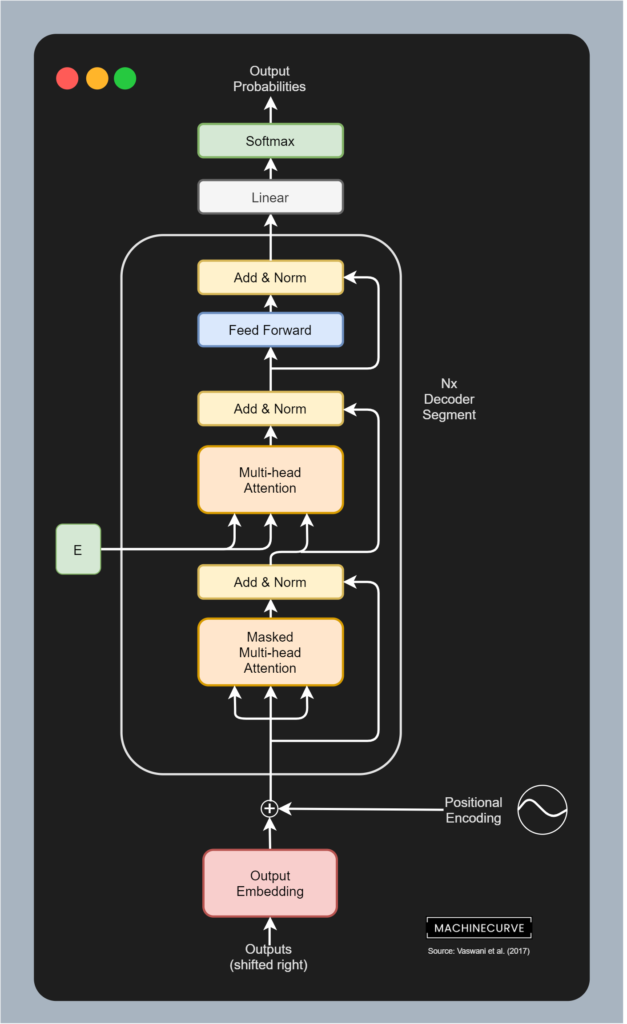

#### **Transformer model Architecture**
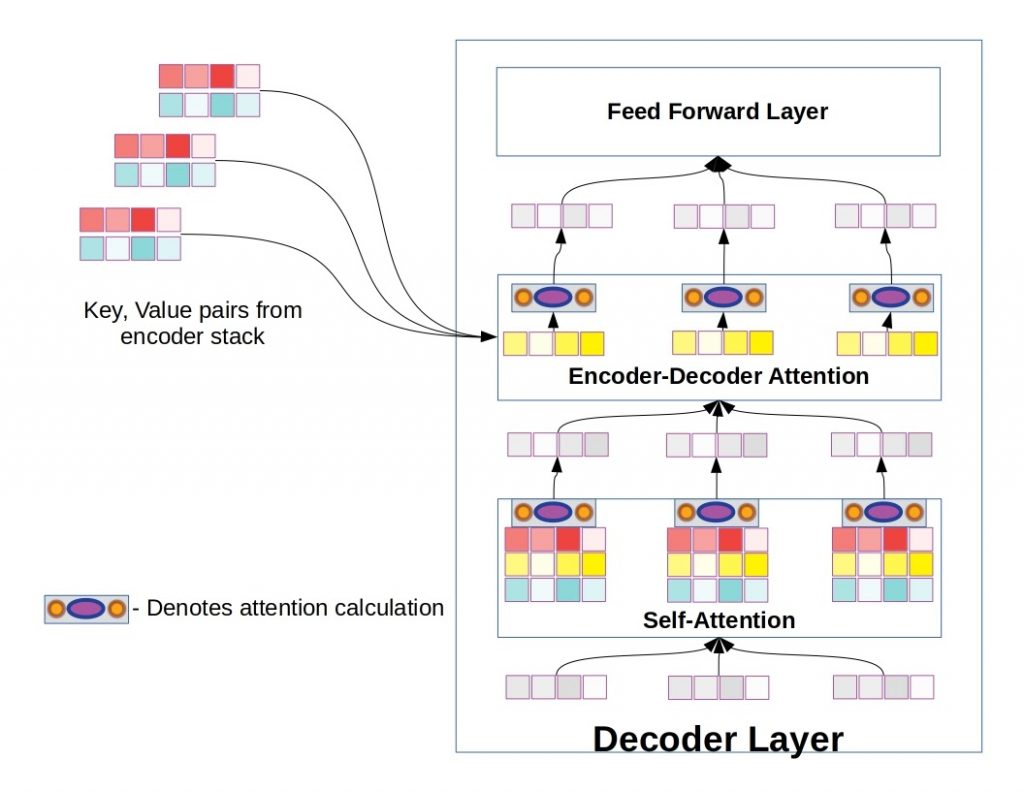


**link to photo:** https://dzone.com/articles/a-deep-dive-into-the-transformer-architecture-the

#### **Reference**
1. **Microsoft's official documentation on the model:** https://huggingface.co/microsoft/DialoGPT-large?text=Hey+my+name+is+Julien%21+How+are+you%3F

2. **A Medium article discussing the model's architecture and capabilities:** https://towardsdatascience.com/how-to-build-a-state-of-the-art-conversational-ai-with-transfer-learning-2d818ac26313

3. **A case study of using the model for customer service chatbots:** https://medium.com/azure-data-lake/using-conversational-ai-to-improve-customer-service-ff1cc60d7b0b

4. **A GitHub repository containing example code and projects using the model:** https://github.com/microsoft/DialoGPT

5. **Transformers library:**https://huggingface.co/docs/transformers/model_doc/dialogpt

6. **Microsoft Reasearh**:https://www.microsoft.com/en-us/research/project/large-scale-pretraining-for-response-generation/#:~:text=Like%20GPT-2%2C%20DialoGPT%20is%20formulated%20as%20an%20autoregressive,147M%20multi-turn%20dialogues%20extracted%20from%20Reddit%20discussion%20threads.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.8 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [ ]:
# Load the tokenizer with left padding
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-large", padding_side="left")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-large")

In [ ]:

# Define a function for generating the bot's response to user input
def generate_response(user_input, chat_history=""):
  try:
        # Encode the new user input and concatenate with the chat history
        new_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors='pt')
        # Append the new user input to the chat history if there is one
        if chat_history != "":
            chat_history_ids = tokenizer.encode(chat_history, return_tensors='pt')
            input_ids = torch.cat([chat_history_ids, new_input_ids], dim=-1)
        else:
            input_ids = new_input_ids

        # Generate response by passing input_ids through the model
        output = model.generate(input_ids=input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

        # Decode the model's output and extract the generated response
        response = tokenizer.decode(output[:, input_ids.shape[-1]:][0], skip_special_tokens=True)

        # Return the response or a default response
        if response.strip() != '':
            return response
        else:
            return "Sorry, I don't understand."
  except Exception as e:
    print("An error occurred while generating the bot's response:")
    print(str(e))
    return "Sorry, an error occurred while generating my response. Please try again later."

# Start the conversation loop
print("Hello! I am a Dictator. You can ask me anything.")
print("Enter quit if you want to stop the Conversation!!!! ")
chat_history = ""
while True:
    user_input = input("You: ")
    if user_input == "quit":
      break 
    bot_response = generate_response(user_input, chat_history)
    print("Bot: " + bot_response)
    chat_history += user_input + tokenizer.eos_token + bot_response + tokenizer.eos_token

Hello! I am a Dictator. You can ask me anything.
Enter quit if you want to stop the Conversation!!!! 
You: hey


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: Hey, how are you?
You: great and you


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: I'm great, you?
You: 	What is the best way to buy happiness ?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: buy happiness
You: Does money buy happiness?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: No, but it does buy happiness.
You: bye bye


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Bot: I'm not sure if I should upvote or downvote you.
You: quit
